In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
a1 = pd.read_csv('Stores.csv')
a1.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
print("Data type : ", type(a1))
print("Data dims : ", a1.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (896, 5)


In [5]:
print(a1.dtypes)

Store ID                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object


In [6]:
S_Data = pd.DataFrame(a1[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']])
S_Data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [7]:
S_Data.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


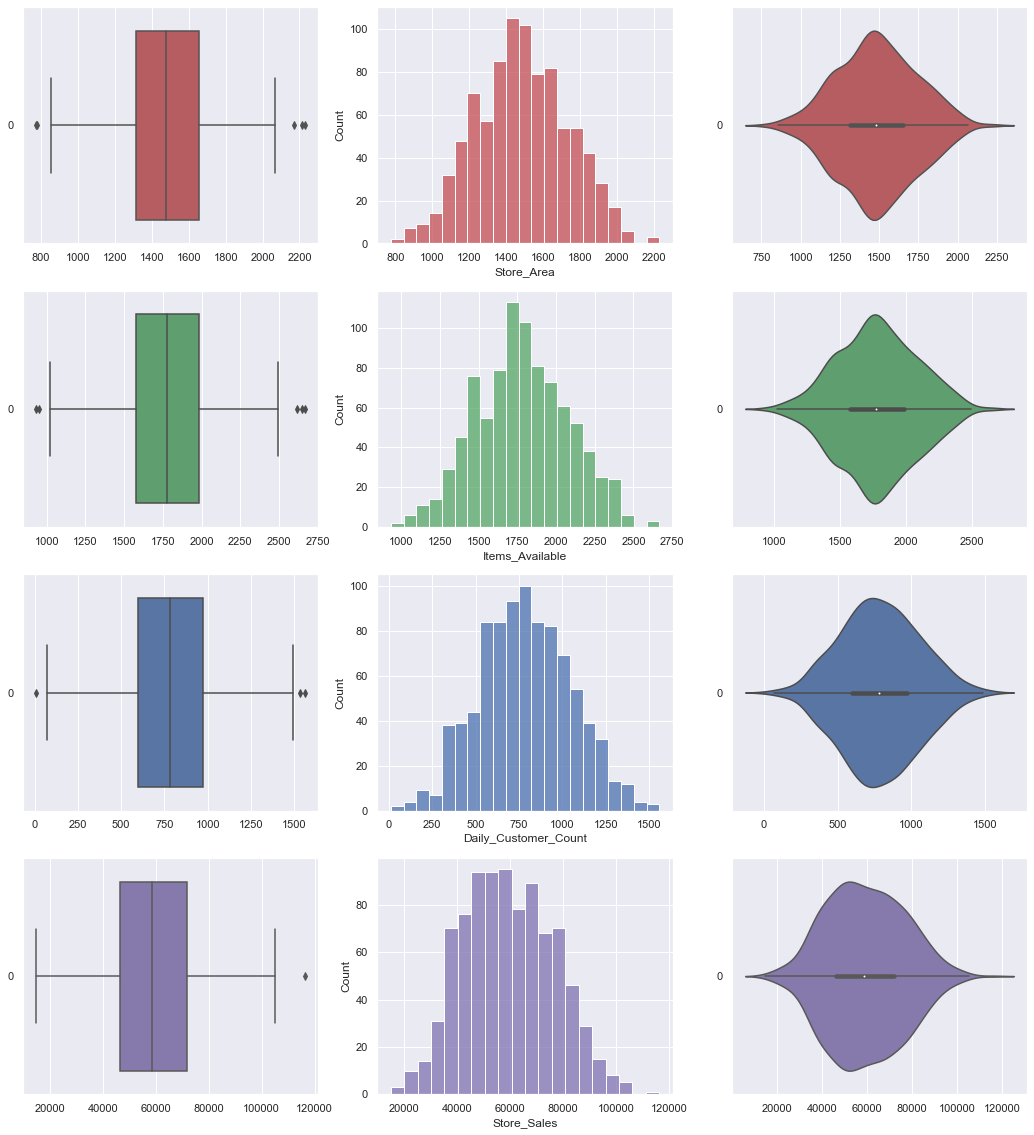

In [8]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 20))
colors = ["r", "g", "b", "m"]

count = 0
for var in S_Data:
    sb.boxplot(data=a1[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=a1[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data=a1[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

### Check the Relationship amongst Variables

Correlation between the variables, followed by all bi-variate jointplots.

                      Store_Area  Items_Available  Daily_Customer_Count  \
Store_Area              1.000000         0.998891             -0.041423   
Items_Available         0.998891         1.000000             -0.040978   
Daily_Customer_Count   -0.041423        -0.040978              1.000000   
Store_Sales             0.097474         0.098849              0.008629   

                      Store_Sales  
Store_Area               0.097474  
Items_Available          0.098849  
Daily_Customer_Count     0.008629  
Store_Sales              1.000000  


<AxesSubplot:>

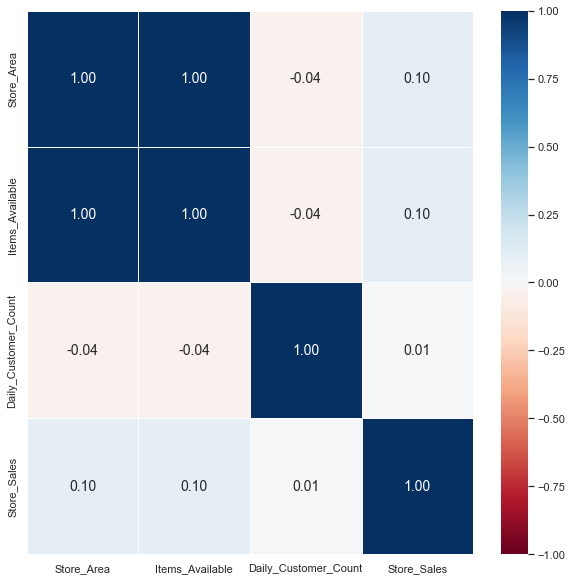

In [9]:
# Correlation Matrix
print(S_Data.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(S_Data.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

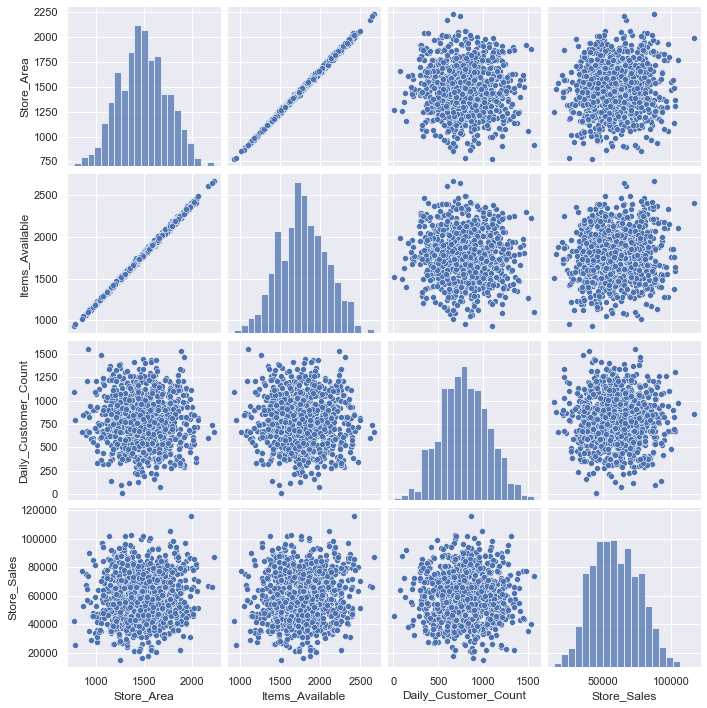

In [10]:
# Draw pairs of variables against one another
sb.pairplot(data = S_Data)

# Problem Statement: 
Can cutting down on store area to save on too many products affect the sales of the store?

In [11]:
StoreArea = pd.DataFrame(a1['Store_Area'])
StoreSales = pd.DataFrame(a1['Store_Sales'])

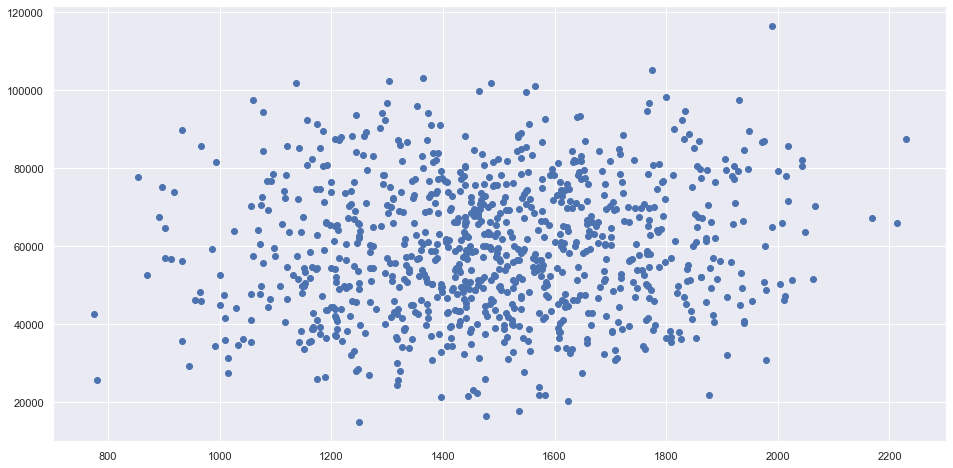

In [12]:
# Extract the Features from the Data
X = pd.DataFrame(S_Data[["Store_Area", "Store_Sales"]])

# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Store_Area", y = "Store_Sales", data = X)

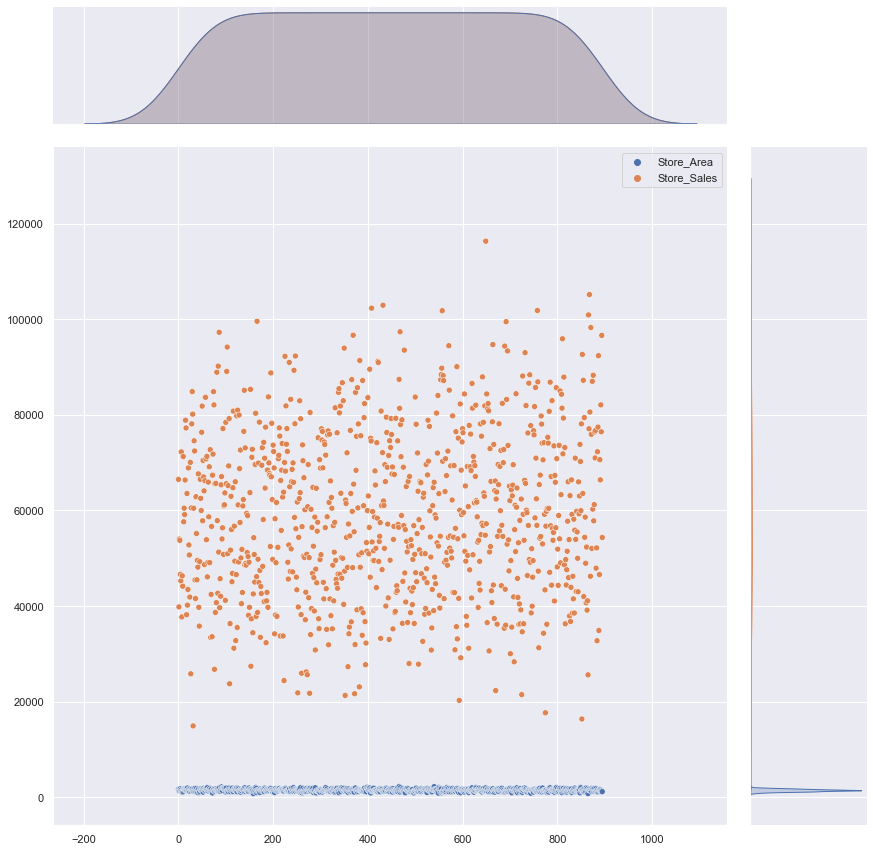

In [13]:
# Plot StoreSales against StoreArea using standard jointplot

# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([StoreArea, StoreSales], axis = 1).reindex(StoreArea.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = jointDF, height = 12)

In [14]:
# Import Linear Regression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# make train and test set with ratio 75:25
# as there is total of 896 data, following the ratio, get 672 train and 224 test sets

#import the essential models and functions from sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

StoreArea_train, StoreArea_test, StoreSales_train, StoreSales_test = train_test_split(StoreArea, StoreSales, test_size = 224/896)

# Check the sample sizes
print("Train Set :", StoreArea_train.shape, StoreSales_train.shape)
print("Test Set  :", StoreArea_test.shape, StoreSales_test.shape)

Train Set : (672, 1) (672, 1)
Test Set  : (224, 1) (224, 1)


In [15]:
# Fit a Linear Regression model with X = StoreArea_train and y = StoreSales_train

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(StoreArea_train, StoreSales_train)

LinearRegression()

In [16]:
# Print the coefficients of the Linear Regression model just fit

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [46686.53167703]
Coefficients 	: a =  [[8.89353955]]


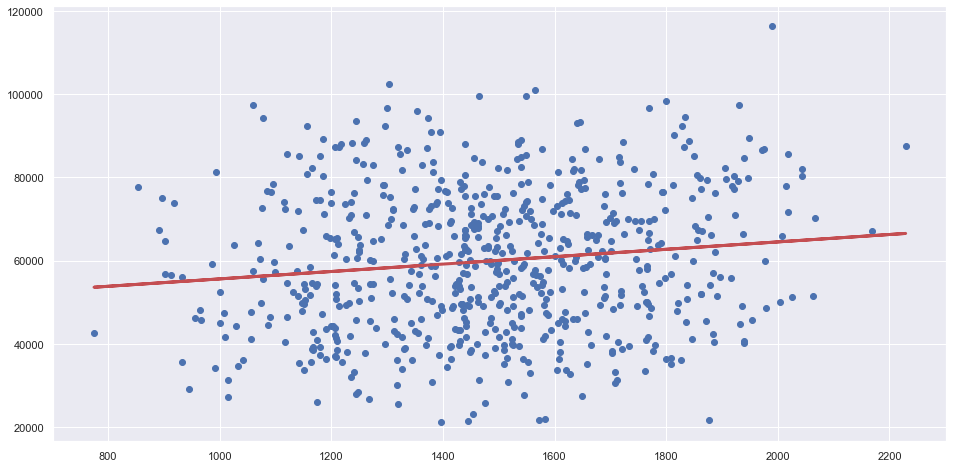

In [17]:
# plot the Regression line on a Scatterplot 

# Formula for the Regression line
regline_x = StoreArea_train.to_numpy()
regline_y = linreg.intercept_ + linreg.coef_ * regline_x

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(StoreArea_train, StoreSales_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

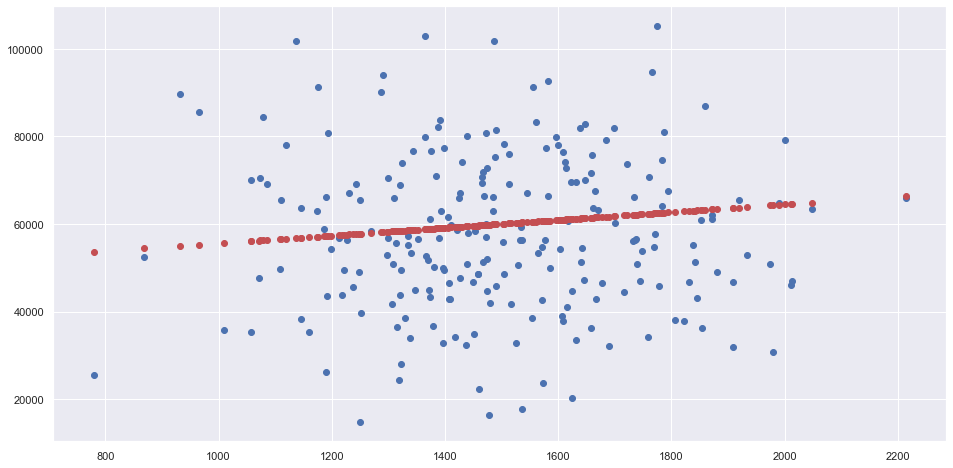

In [18]:
# Predict SalePrice for the test dataset StoreSales_test using the Linear Regression model,
StoreSales_test_pred = linreg.predict(StoreArea_test)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(StoreArea_test, StoreSales_test)

plt.scatter(StoreArea_test, StoreSales_test_pred, color = "r")
plt.show()


In [19]:
# Find the Explained Variance (R^2) of the model on the Train set and on the Test set to check Goodness of Fit.

# train set
print("Explained Variance (R^2) for train\t:", linreg.score(StoreArea_train, StoreSales_train))

# test set
print("Explained Variance (R^2) for test \t:", linreg.score(StoreArea_test, StoreSales_test))

Explained Variance (R^2) for train	: 0.01749467796242099
Explained Variance (R^2) for test 	: -0.03049438439119645


#### Basic Anomaly Detection

Use the Nearest Neighbors (k-NN) pattern-identification method for detecting Outliers and Anomalies.    
We will use the `LocalOutlierFactor` neighborhood model from `sklearn.neighbors` module.

In [43]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(contamination=0.05)

#### Labeling the Anomalies in the Data

We may use the model on the data to `predict` the anomalies.

<AxesSubplot:xlabel='Anomaly', ylabel='count'>

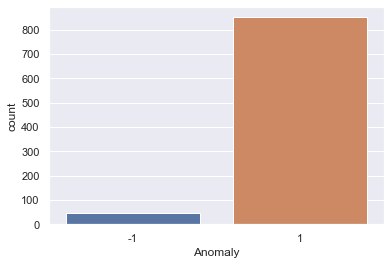

In [44]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=X_labeled["Anomaly"])

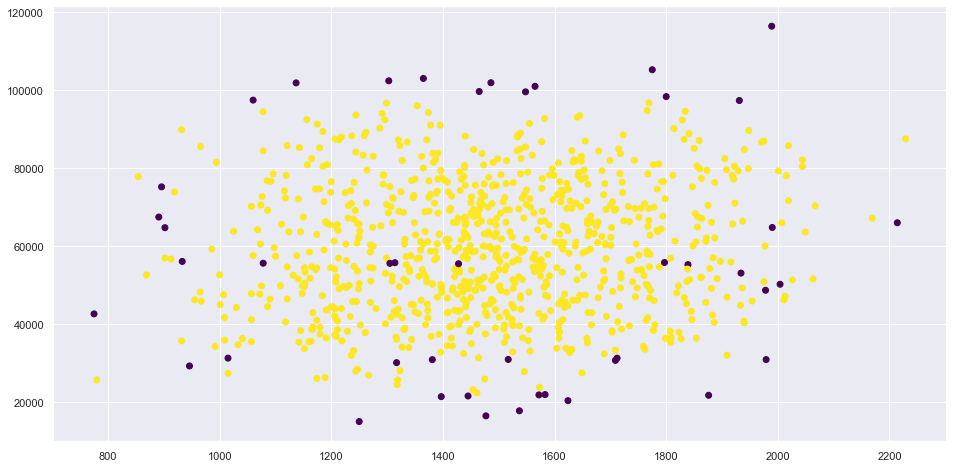

In [45]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Store_Area", y = "Store_Sales", c = "Anomaly", cmap = 'viridis', data = X_labeled)

#### Interpret the Anomalies

Try to interpret the anomalies by exploring the Features across them.

<AxesSubplot:xlabel='Store_Sales', ylabel='Anomaly'>

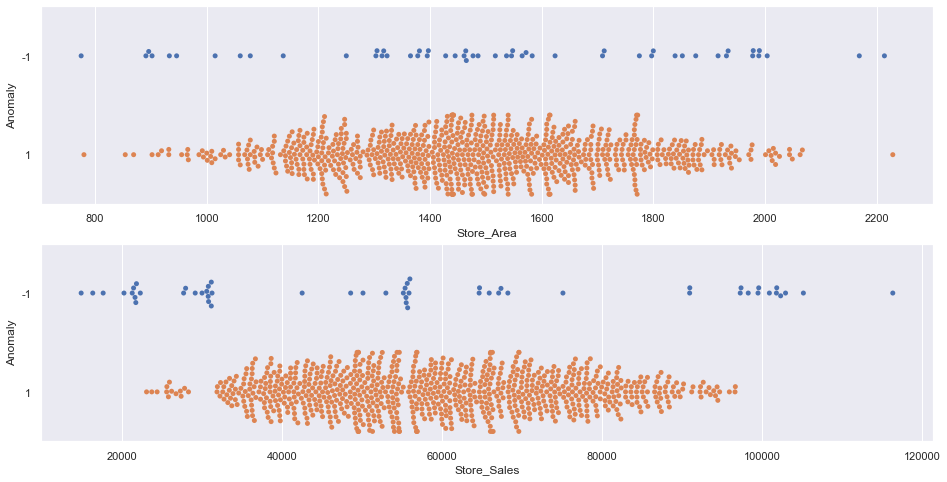

In [23]:
# Boxplots for the Features for the Anomalies
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.swarmplot(x = 'Store_Area', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.swarmplot(x = 'Store_Sales', y = 'Anomaly', data = X_labeled, ax = axes[1])

<AxesSubplot:xlabel='Store_Sales', ylabel='Anomaly'>

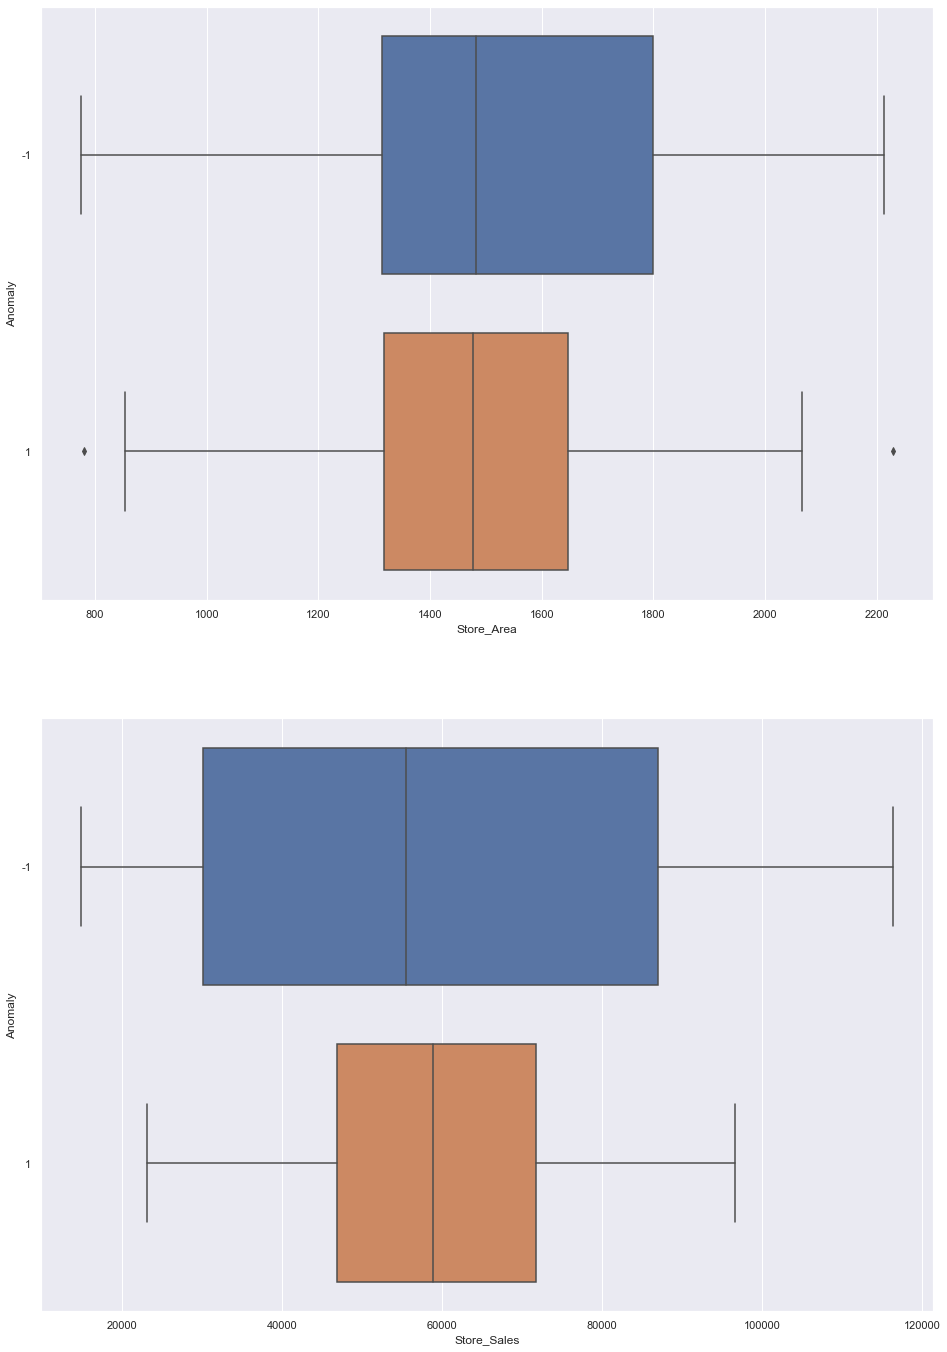

In [24]:
# Boxplots for the two Features against the Anomalies
f, axes = plt.subplots(2, 1, figsize=(16,24))
sb.boxplot(x = 'Store_Area', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Store_Sales', y = 'Anomaly', data = X_labeled, ax = axes[1])


# Anomaly Detection Method 2

https://towardsdatascience.com/k-nearest-neighbors-knn-for-anomaly-detection-fdf8ee160d13

In [50]:
from sklearn.neighbors import NearestNeighbors
# modeling
nbrs = NearestNeighbors(n_neighbors = 3)

#fit model
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

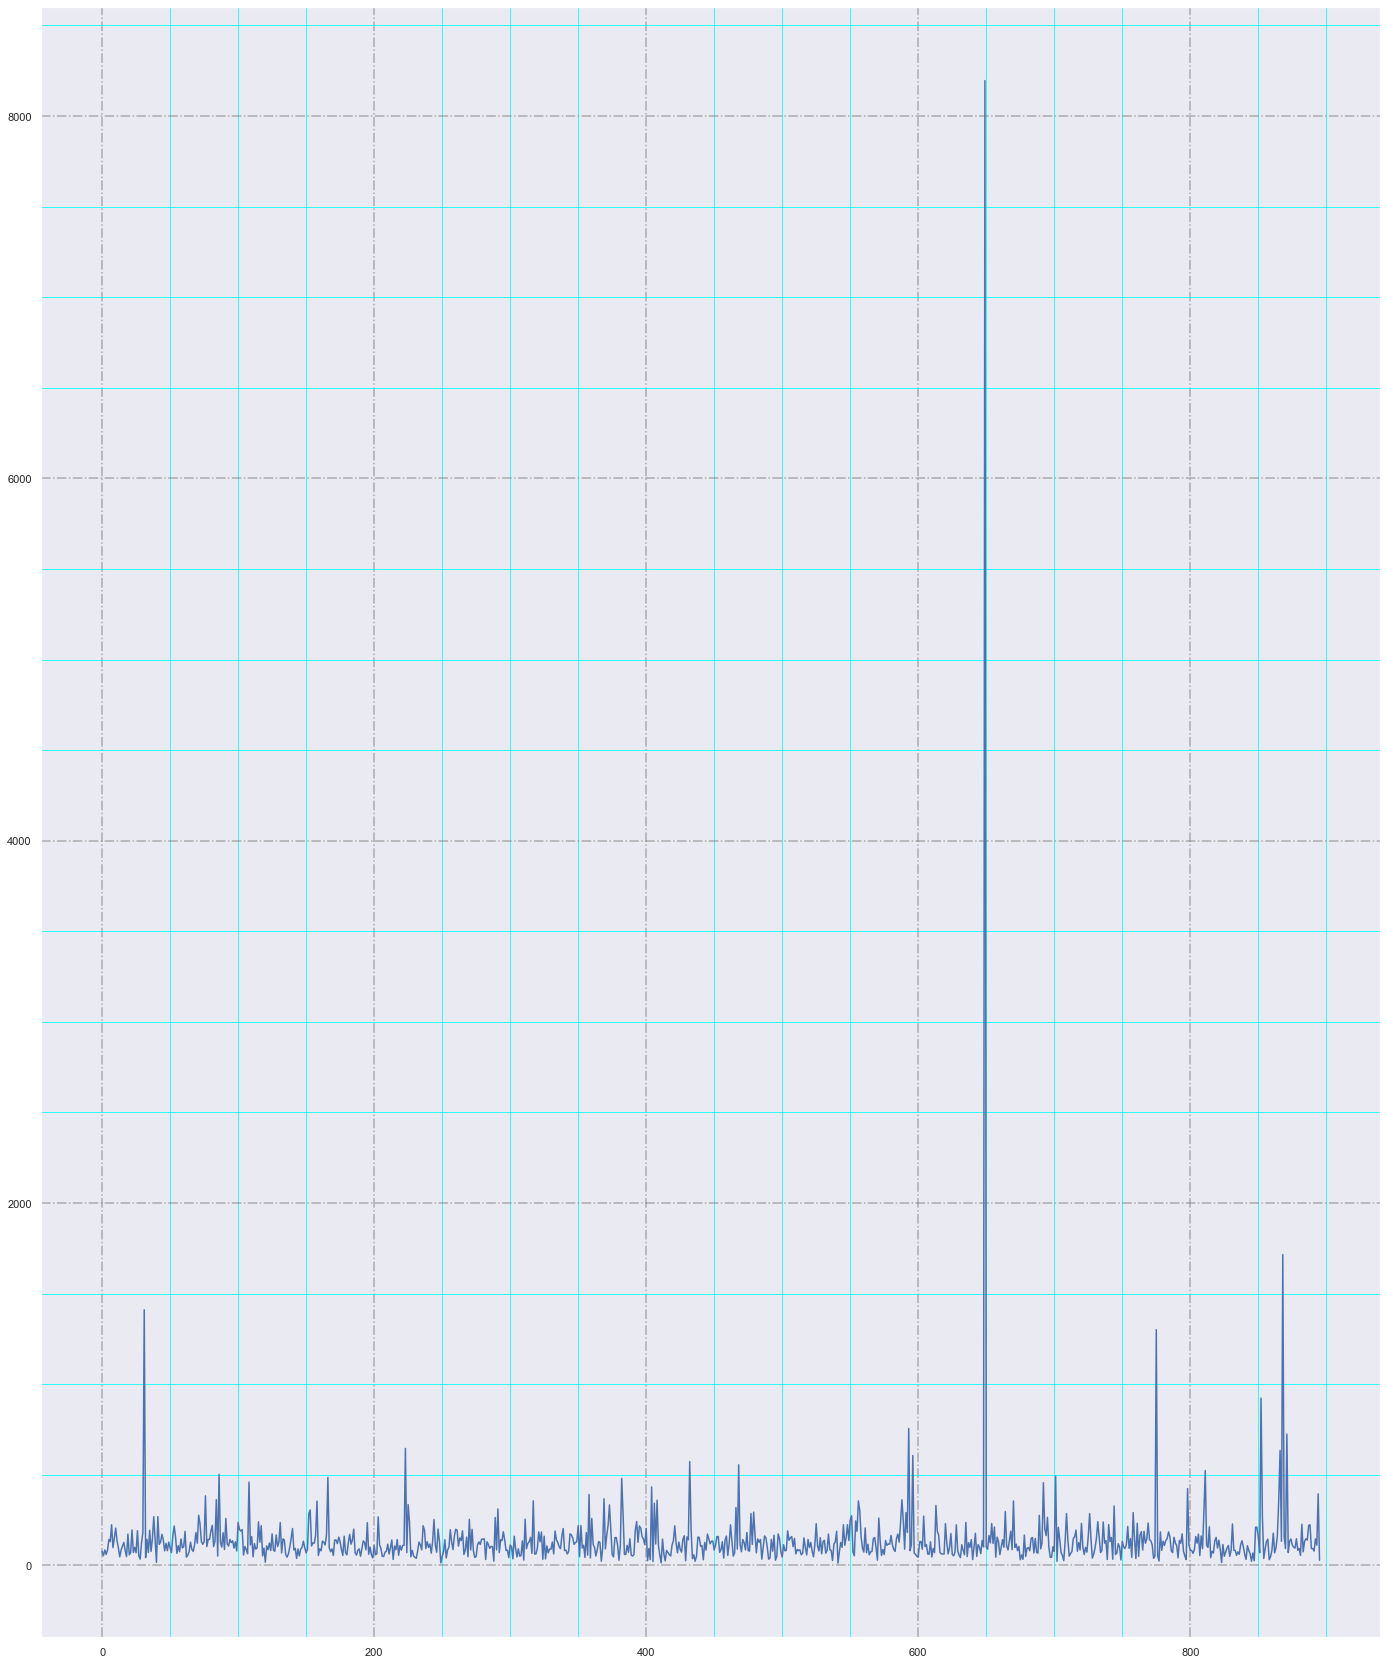

In [62]:
# distnaces and indexes of k-neighbors from model outputs
distances, indexes = nbrs.kneighbors(X)

#plot mean of k-distances of each observation
plt.plot(distances.mean(axis=1))
plt.rcParams["figure.figsize"] = (24, 30) # enlarge graph size
#major grid lines
plt.grid(visible=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5)
#minor grid lines
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='aqua', alpha=0.8, ls='-', lw=1)
plt.show()
# https://towardsdatascience.com/making-plots-in-jupyter-notebook-beautiful-more-meaningful-23c8a35c0d5d

# what is plotted is the average distances for each of the observations in the dataset
# the spikes are potentially anomalies or outliers in the dataset

In [63]:
# determining the cutoff value to filter anomalies
# inspecting the figure above (y-axis) some cutoff possibilities are: 500, 1000, 1500
# Here, I visually determined cutoff values > 1000
outlier_index = np.where(distances.mean(axis=1)>1000)
outlier_index

(array([ 31, 649, 775, 868], dtype=int64),)

In [65]:
#filter outlier values
outlier_values = X.iloc[outlier_index]
outlier_values

,Store_Area,Store_Sales
31,1250,14920
649,1989,116320
775,1537,17670
868,1775,105150


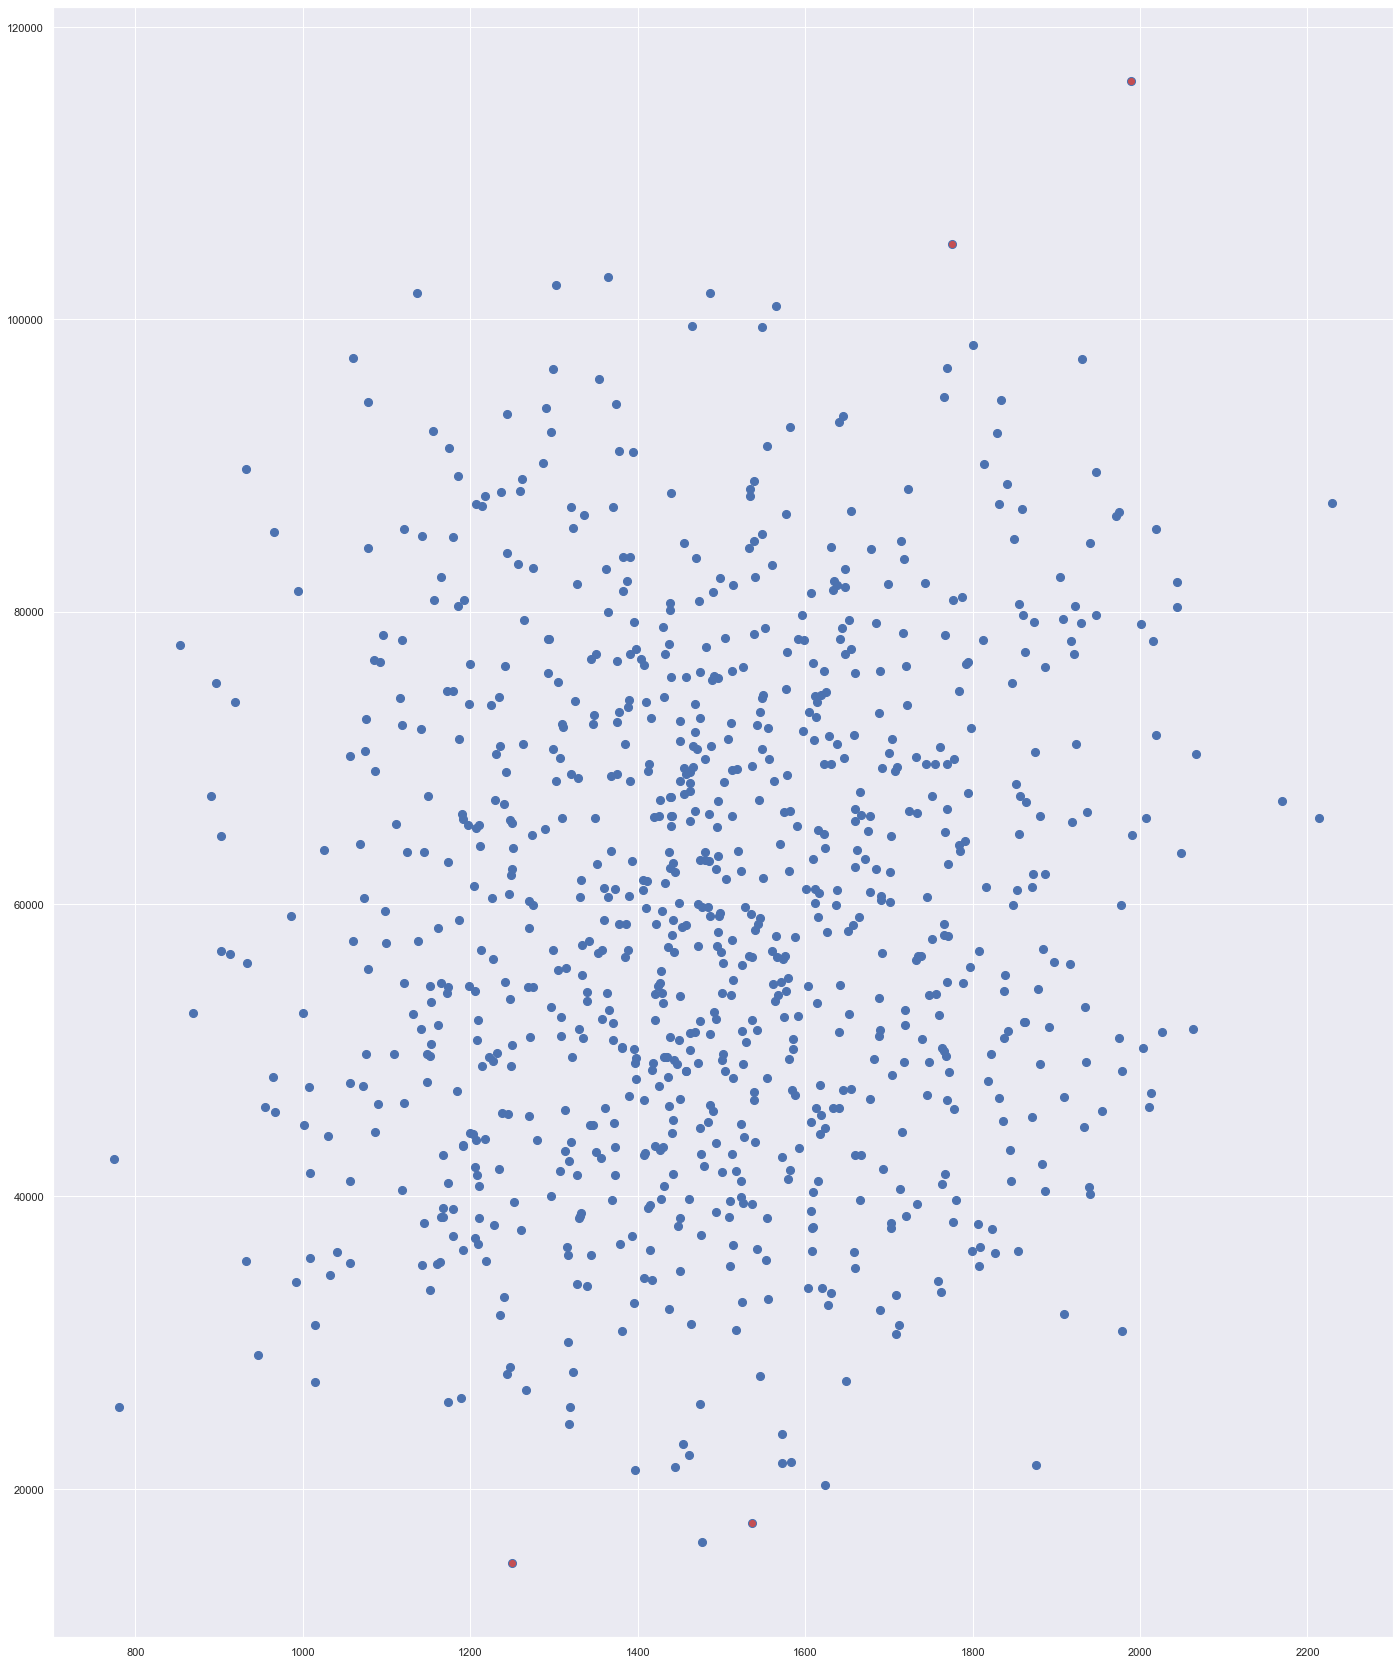

In [71]:
# plotting anomalies 
# plot data
plt.scatter(X["Store_Area"], X["Store_Sales"], color = "b", s = 65)

# plot outlier values
plt.scatter(outlier_values["Store_Area"], outlier_values["Store_Sales"], color = "r")

In [73]:
# This time setting 500 as the cutoff limit,
outlier_index = np.where(distances.mean(axis=1)>500)
outlier_index

#filter outlier values
outlier_values = X.iloc[outlier_index]
outlier_values

,Store_Area,Store_Sales
31,1250,14920
86,1931,97260
223,1318,24410
432,1365,102920
468,1060,97360
593,1624,20270
596,946,29170
649,1989,116320
775,1537,17670
811,1354,95900


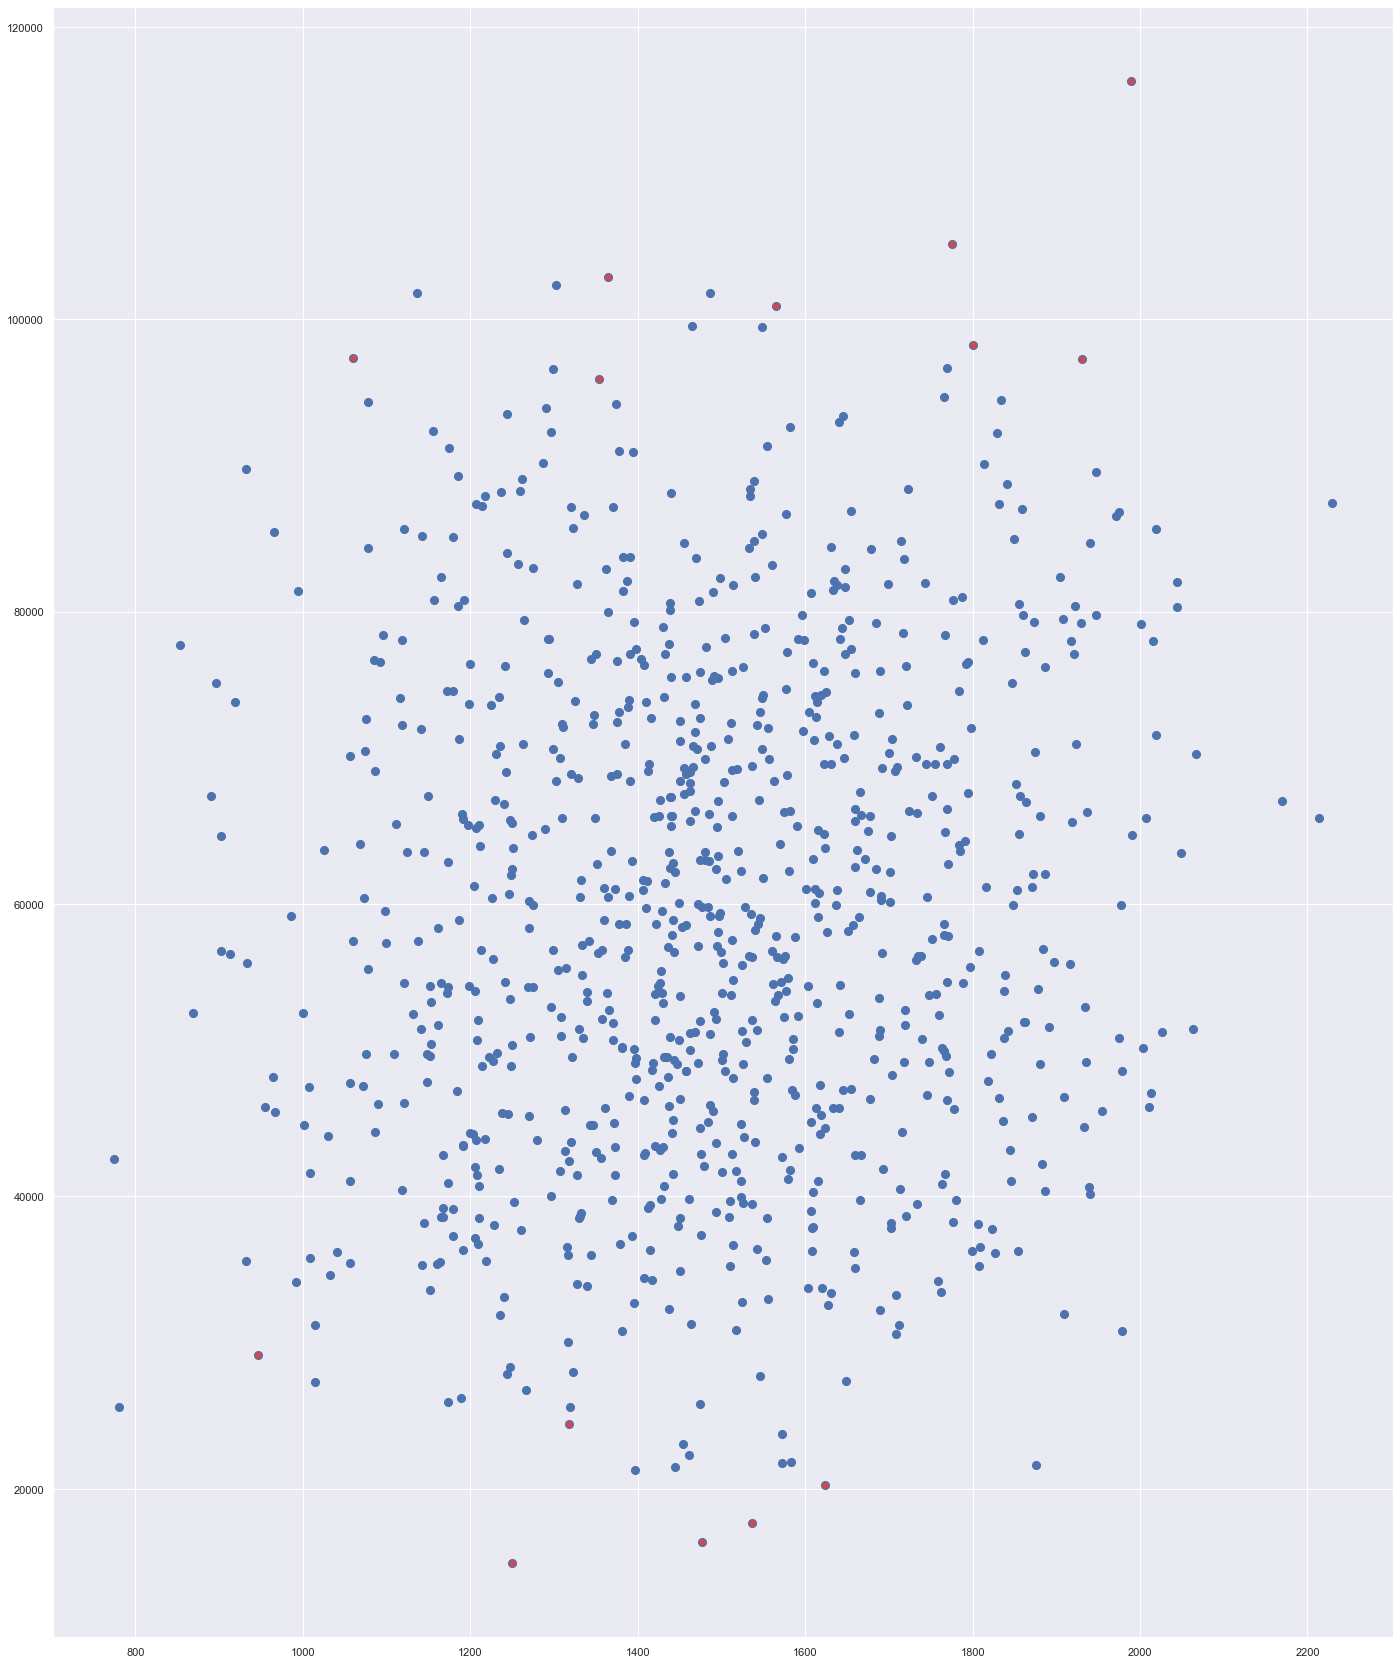

In [76]:
# plot data
plt.scatter(X["Store_Area"], X["Store_Sales"], color = "b", s = 65)

# plot outlier values
plt.scatter(outlier_values["Store_Area"], outlier_values["Store_Sales"], color = "r")